In [26]:
from pathlib import Path
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:

output_folder = Path("../output/")
latest_file = sorted(output_folder.glob("*_experiment.parquet"))[-1]

df = pl.read_parquet(latest_file)
df

method_name,dataset_name,tissue,organism,query_repository,query_id,reference_repository,reference_id,label,barcode,x,y,ground_truth
str,str,str,str,str,str,str,str,str,str,f64,f64,null
"""nmf""","""human_liver_10x""","""lung""","""human""","""10x""","""Xenium_V1_hLiver_nondiseased_s…","""livercellatlas""","""Liver Cell Atlas: Human, All L…","""Fibroblasts""","""0""",3998.993853,2383.156307,null
"""nmf""","""human_liver_10x""","""lung""","""human""","""10x""","""Xenium_V1_hLiver_nondiseased_s…","""livercellatlas""","""Liver Cell Atlas: Human, All L…","""pDCs""","""1""",3919.613971,2792.310145,null
"""nmf""","""human_liver_10x""","""lung""","""human""","""10x""","""Xenium_V1_hLiver_nondiseased_s…","""livercellatlas""","""Liver Cell Atlas: Human, All L…","""T cells""","""2""",3859.799805,2303.130888,null
"""nmf""","""human_liver_10x""","""lung""","""human""","""10x""","""Xenium_V1_hLiver_nondiseased_s…","""livercellatlas""","""Liver Cell Atlas: Human, All L…","""Fibroblasts""","""3""",3946.837661,2318.499828,null
"""nmf""","""human_liver_10x""","""lung""","""human""","""10x""","""Xenium_V1_hLiver_nondiseased_s…","""livercellatlas""","""Liver Cell Atlas: Human, All L…","""pDCs""","""4""",3907.33542,2372.912598,null
…,…,…,…,…,…,…,…,…,…,…,…,…
"""nmf""","""mouse_small_intestine""","""small_intestine""","""mouse""","""https://github.com/ankitbioinf…","""inputQuery.zip""","""https://github.com/ankitbioinf…","""inputRef.zip""","""Plasma""","""cell8165""",4093.666667,3978.75,null
"""nmf""","""mouse_small_intestine""","""small_intestine""","""mouse""","""https://github.com/ankitbioinf…","""inputQuery.zip""","""https://github.com/ankitbioinf…","""inputRef.zip""","""Glial""","""cell8166""",4386.785714,4090.428571,null
"""nmf""","""mouse_small_intestine""","""small_intestine""","""mouse""","""https://github.com/ankitbioinf…","""inputQuery.zip""","""https://github.com/ankitbioinf…","""inputRef.zip""","""Plasma""","""cell8167""",3804.25,4904.666667,null


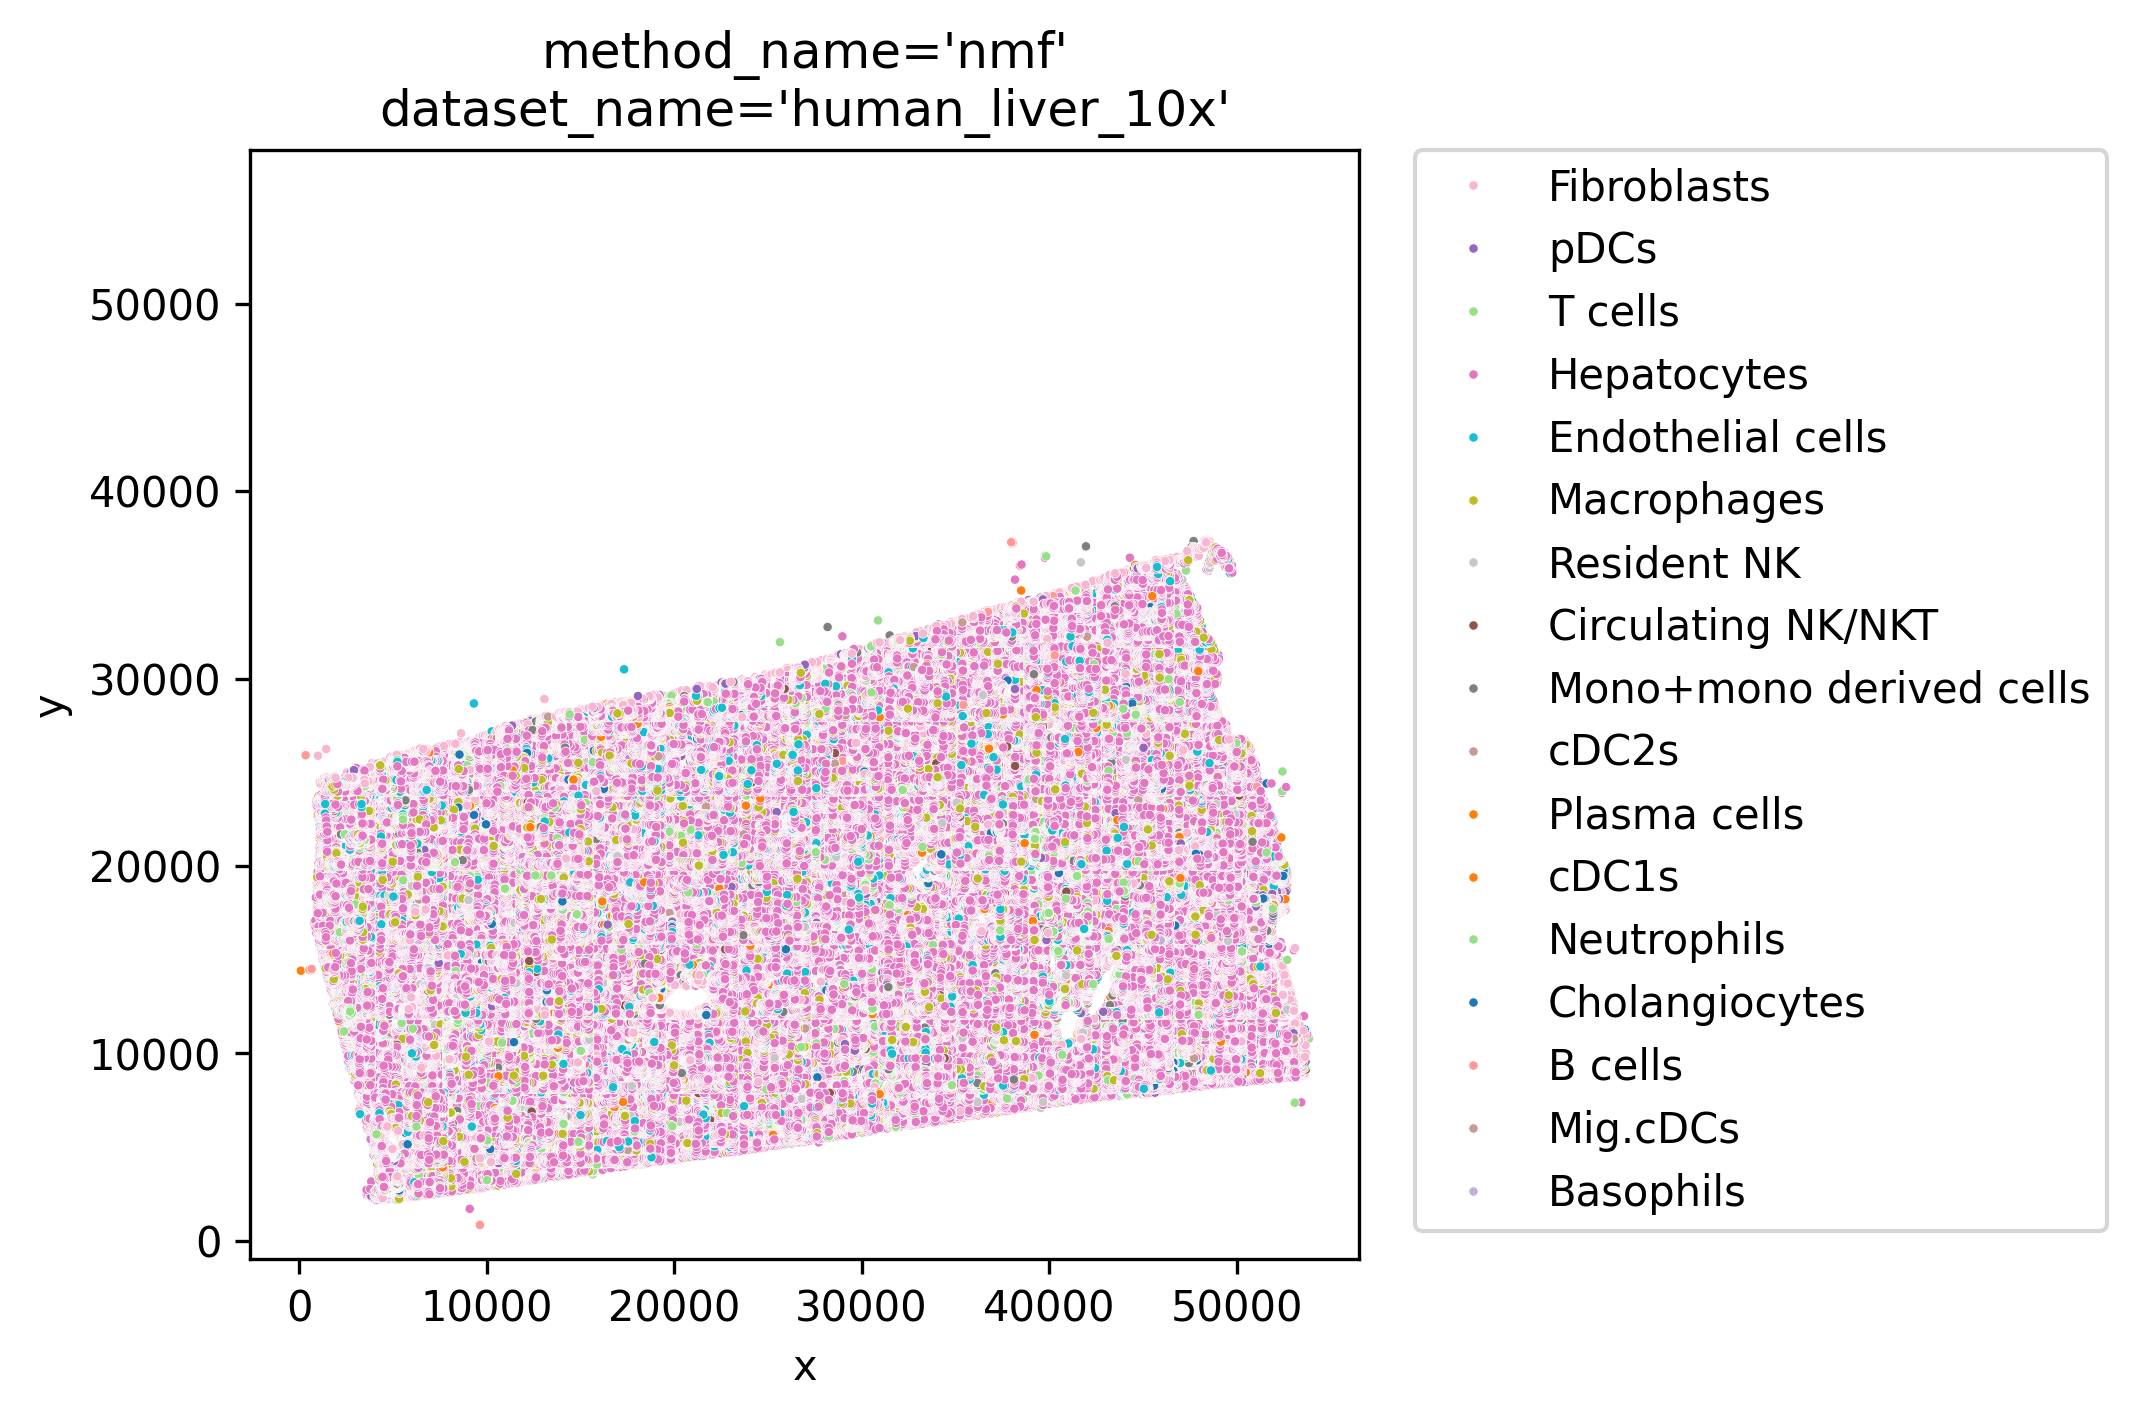

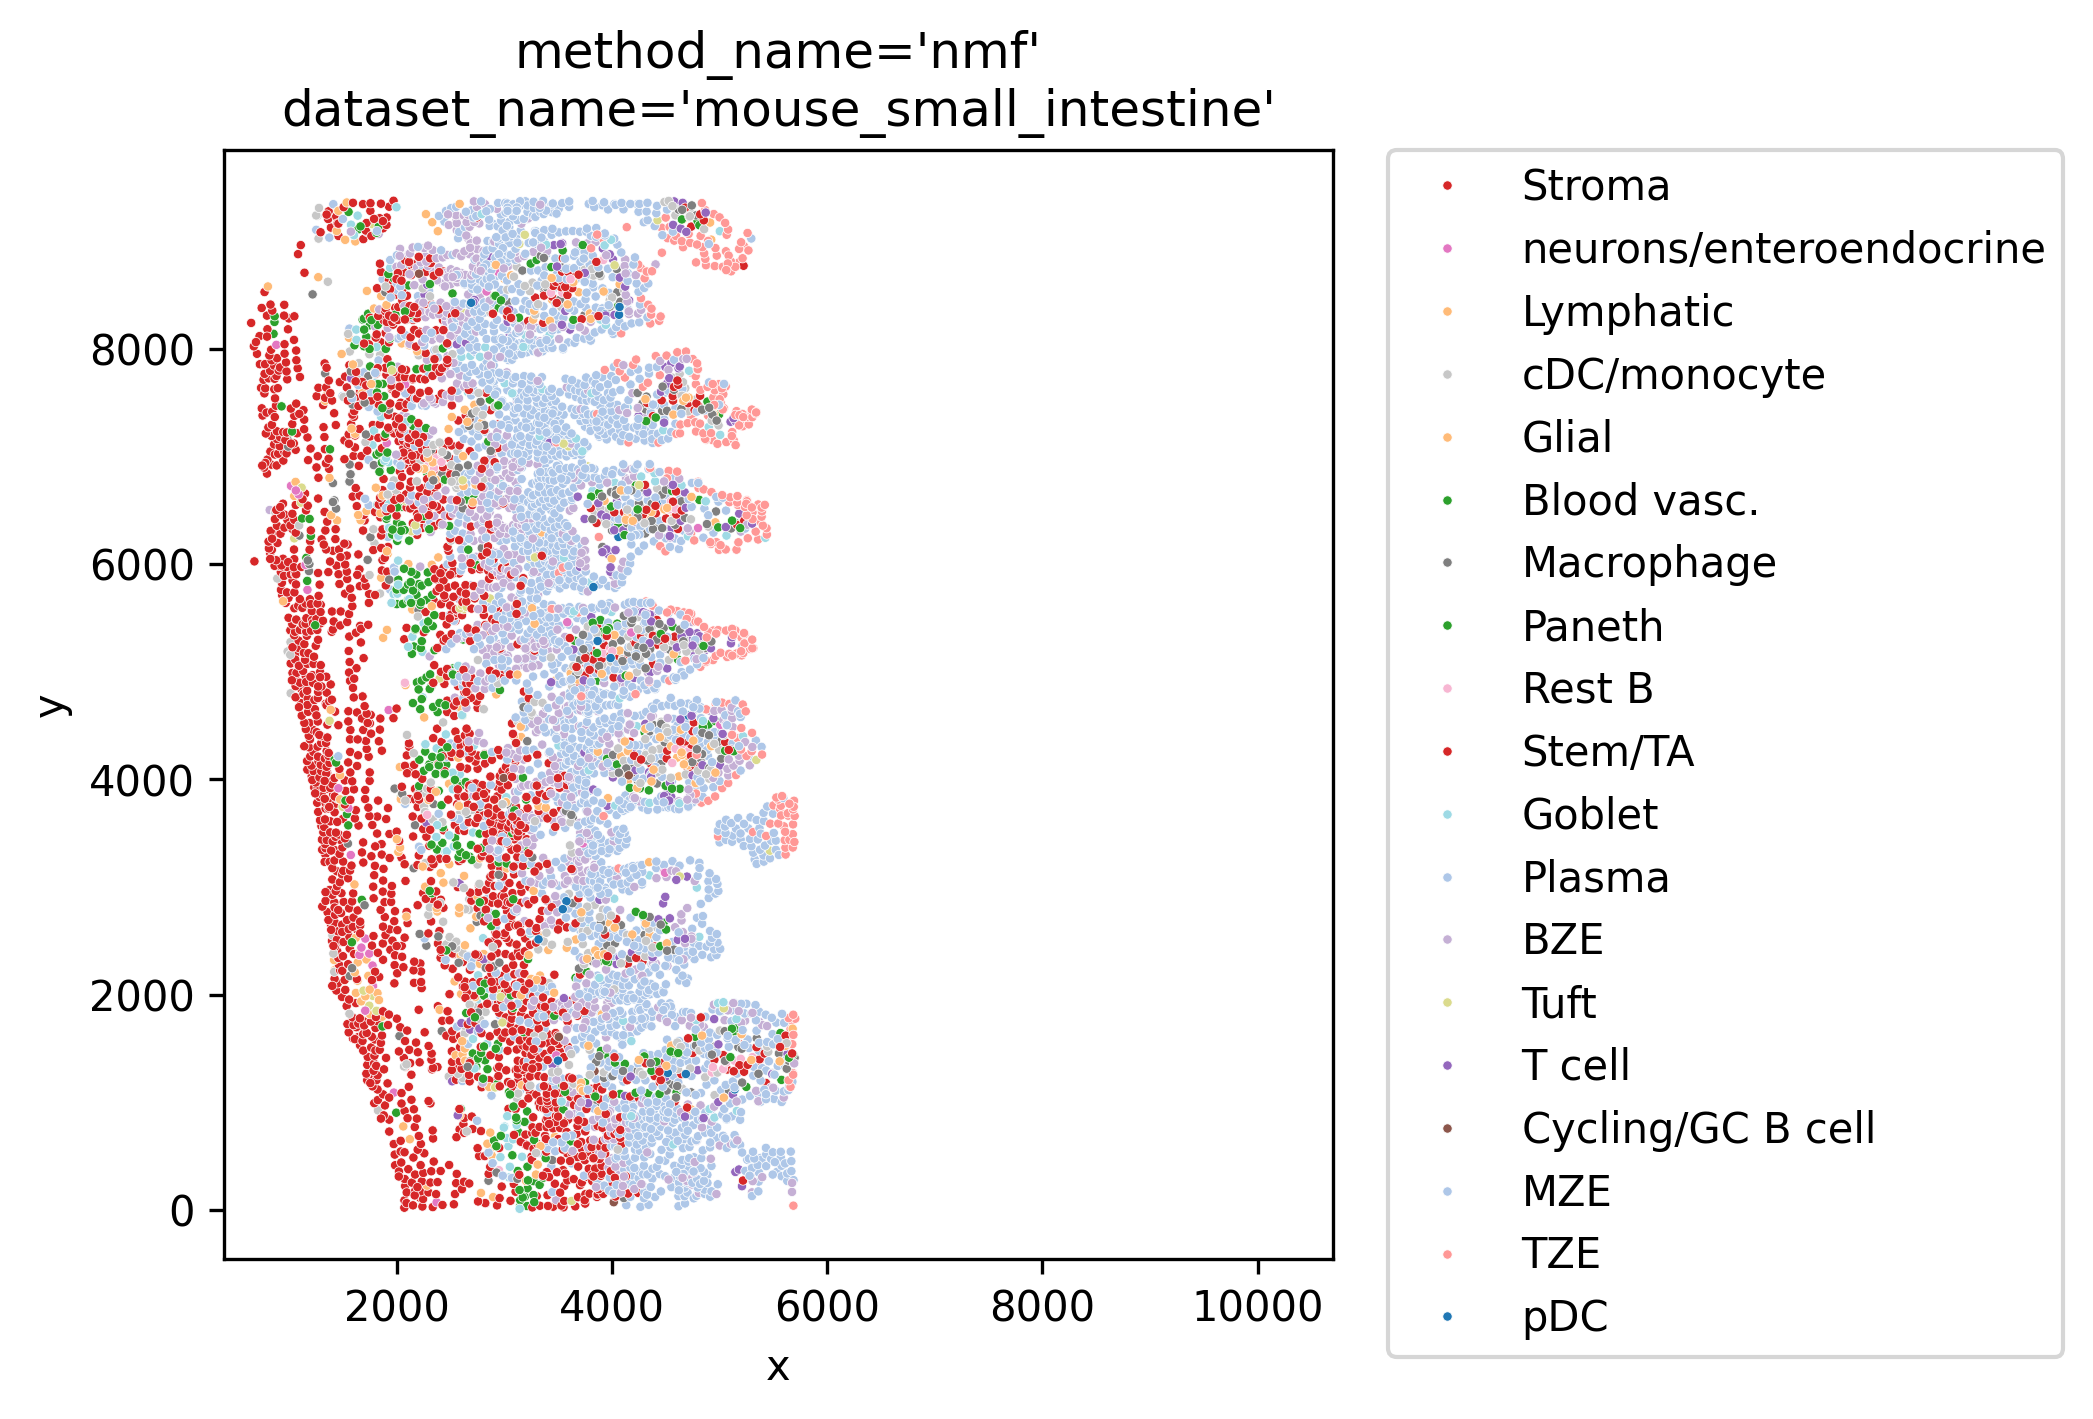

In [43]:
from itertools import product

all_labels = df["label"].unique().to_list()
palette_colors = sns.color_palette("tab20", n_colors=len(all_labels))
palette = dict(zip(all_labels, palette_colors))

for method_name, dataset_name in product(df["method_name"].unique(), df["dataset_name"].unique()):
    title = f"{method_name=}\n{dataset_name=}"

    plt.figure(dpi=300)  # square figure

    sns.scatterplot(
        df.filter(pl.col("method_name") == method_name, pl.col("dataset_name") == dataset_name),
        x="x",
        y="y",
        s=5,
        hue="label",
        palette=palette
    )

    plt.axis("square")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title(title)
    plt.show()

/tmp/ipykernel_2724281/435353348.py:20: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
/tmp/ipykernel_2724281/435353348.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


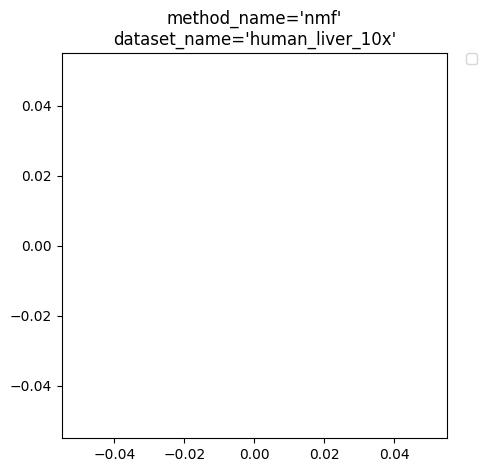

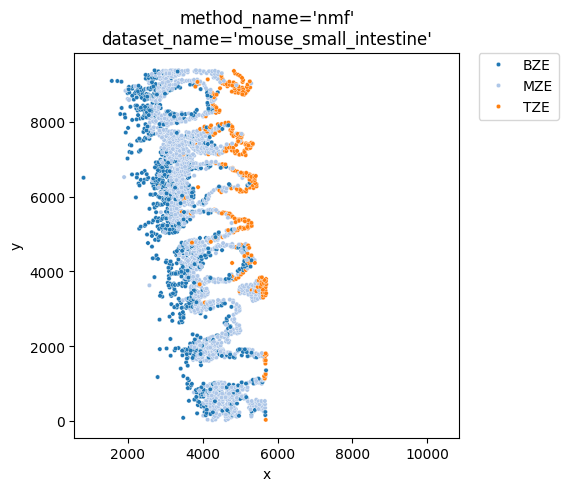

In [44]:
from itertools import product

keep_labels = ["BZE", "MZE", "TZE"]

all_labels = keep_labels
palette_colors = sns.color_palette("tab20", n_colors=len(all_labels))
palette = dict(zip(all_labels, palette_colors))

for method_name, dataset_name in product(df["method_name"].unique(),
                                         df["dataset_name"].unique()):

    subset = (
        df
        .filter(pl.col("method_name") == method_name,
                pl.col("dataset_name") == dataset_name,
                pl.col("label").is_in(keep_labels))
    )

    plt.figure(figsize=(5, 5))  # square figure
    sns.scatterplot(
        subset,
        x="x",
        y="y",
        s=10,
        hue="label",
        palette=palette
    )

    plt.axis("square")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.title(f"{method_name=}\n{dataset_name=}")
    plt.show()

In [46]:
wide = (
    df.pivot(
        index="barcode",
        on="method_name",
        values="label",
    )
)

In [31]:
import itertools
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_pairwise_confusion(df: pl.DataFrame):
    """
    Given a wide Polars dataframe with structure:
        barcode | method1 | method2 | method3 | ...
    Plot confusion matrices for every pair of method columns.
    """

    # All label columns except barcode
    label_cols = df.columns[1:]

    # Convert once to pandas for plotting
    pdf = df.to_pandas()

    # Iterate through all pairs
    for a, b in itertools.combinations(label_cols, 2):
        confusion = (
            pdf.groupby([a, b])
               .size()
               .unstack(fill_value=0)
               .sort_index(axis=0)
               .sort_index(axis=1)
        )

        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, fmt="d", cmap="viridis")
        plt.title(f"Confusion Matrix: {a} vs {b}")
        plt.xlabel(b)
        plt.ylabel(a)
        plt.tight_layout()
        plt.show()

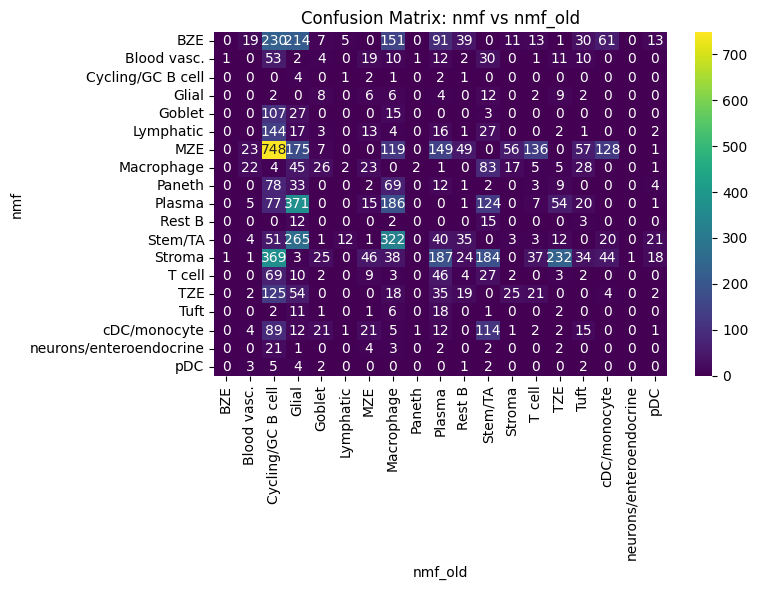

In [45]:
plot_pairwise_confusion(wide)